In [79]:
import numpy as np
import pandas as pd

In [80]:
df =pd.read_csv("breast-cancer.data",header=None)

In [81]:
df = df.sample(frac=1,random_state=42).reset_index(drop=True) #shuffling to make samples iid 

In [82]:
#Spliting train and test data
N=df.shape[0]
df_train= df[:int(N*0.8)]
df_test=df[int(N*0.8):]

In [83]:
#Finding prior
N=df_train.shape[0]
count = dict(df_train[0].value_counts())
prior = dict([(k, v/N) for k,v in count.items()])
prior

{'no-recurrence-events': 0.6929824561403509,
 'recurrence-events': 0.30701754385964913}

In [84]:
#Finding Likelihood
likelihood={}
for class_i in prior.keys():
    df_class=df_train[df_train[0]==class_i]
    N_class = df_class.shape[0]
    likelihood[class_i]={}
    for col in range(1,10):
        feauture_count = dict(df_class[col].value_counts())
        keys = df[col].unique()
        likelihood[class_i][col] = dict([(k,feauture_count[k]/N_class) if k in feauture_count else (k,0) for k in keys])
likelihood

{'no-recurrence-events': {1: {'40-49': 0.31645569620253167,
   '60-69': 0.1962025316455696,
   '50-59': 0.34177215189873417,
   '30-39': 0.12025316455696203,
   '70-79': 0.0189873417721519,
   '20-29': 0.006329113924050633},
  2: {'premeno': 0.5316455696202531,
   'ge40': 0.44936708860759494,
   'lt40': 0.0189873417721519},
  3: {'20-24': 0.16455696202531644,
   '45-49': 0.012658227848101266,
   '30-34': 0.18354430379746836,
   '40-44': 0.0759493670886076,
   '15-19': 0.08860759493670886,
   '10-14': 0.1518987341772152,
   '50-54': 0.02531645569620253,
   '35-39': 0.06329113924050633,
   '25-29': 0.17088607594936708,
   '0-4': 0.0379746835443038,
   '5-9': 0.02531645569620253},
  4: {'0-2': 0.8291139240506329,
   '24-26': 0,
   '3-5': 0.08860759493670886,
   '6-8': 0.04430379746835443,
   '9-11': 0.012658227848101266,
   '15-17': 0.0189873417721519,
   '12-14': 0.006329113924050633},
  5: {'no': 0.8607594936708861,
   'yes': 0.11392405063291139,
   '?': 0.02531645569620253},
  6: {2: 0

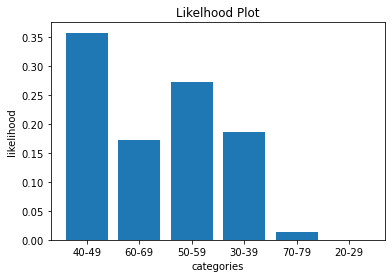

In [85]:
import matplotlib.pyplot as plt
plt.bar(likelihood['recurrence-events'][1].keys(), likelihood['recurrence-events'][1].values())
plt.xlabel('categories')
plt.ylabel('likelihood')
plt.title('Likelhood Plot')
plt.show()

In [86]:
#Finding Posterior Inference
clses = list(prior.keys())
pos = np.zeros((df_train.shape[0],len(clses)))
for i in range(df_train.shape[0]):
    for j,cls in enumerate(clses):
        pos_i = np.log(prior[cls])
        for col in range(1,10):
            pos_i = pos_i + np.log(likelihood[cls][col][df_train.loc[i,col]])
        pos[i,j]=pos_i

C:\Users\91995\AppData\Local\Temp\ipykernel_11372\1393082327.py:8: RuntimeWarning: divide by zero encountered in log
  pos_i = pos_i + np.log(likelihood[cls][col][df_train.loc[i,col]])


In [87]:
df_train.loc[:,"Prediction"]=np.array(cls_names)[np.argmax(pos, axis=1)]

C:\Users\91995\AppData\Local\Temp\ipykernel_11372\3314981118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:,"Prediction"]=np.array(cls_names)[np.argmax(pos, axis=1)]


In [88]:
#Finding  Accuracy on Training data
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score

binarizer = LabelEncoder()
binarizer.fit(df[0].values)
print("Train Accuray=", (df_train[0]==df_train['Prediction']).sum()/df_train.shape[0] )

print("Train F1-score",  f1_score(binarizer.transform(df_train[0].values), binarizer.transform(df_train['Prediction'].values), average='macro' ))

Train Accuray= 0.7456140350877193
Train F1-score 0.6961397058823529


In [89]:
#Predicting for Testing Data
pos = np.zeros((df_test.shape[0],len(clses)))
for i in range(df_test.shape[0]):
    for j,cls in enumerate(clses):
        pos_i = np.log(prior[cls])
        for col in range(1,10):
            pos_i = pos_i + np.log(likelihood[cls][col][df_train.loc[i,col]])
        pos[i,j]=pos_i

C:\Users\91995\AppData\Local\Temp\ipykernel_11372\3987755500.py:7: RuntimeWarning: divide by zero encountered in log
  pos_i = pos_i + np.log(likelihood[cls][col][df_train.loc[i,col]])


In [90]:
df_test.loc[:,"Prediction"]=np.array(cls_names)[np.argmax(pos, axis=1)]

C:\Users\91995\AppData\Local\Temp\ipykernel_11372\603421440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"Prediction"]=np.array(cls_names)[np.argmax(pos, axis=1)]


,0,1,2,3,4,5,6,7,8,9,Prediction
228,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_up,yes,no-recurrence-events
229,no-recurrence-events,50-59,ge40,10-14,0-2,no,2,right,left_low,no,recurrence-events
230,recurrence-events,30-39,premeno,0-4,0-2,no,2,right,central,no,no-recurrence-events
231,no-recurrence-events,50-59,ge40,10-14,0-2,no,1,left,left_up,no,recurrence-events
232,recurrence-events,60-69,ge40,25-29,3-5,no,2,right,right_up,no,recurrence-events


In [91]:
print("Train Accuray=", (df_test[0]==df_test['Prediction']).sum()/df_test.shape[0] )

print("Train F1-score",  f1_score(binarizer.transform(df_test[0].values), binarizer.transform(df_test['Prediction'].values), average='macro' ))

Train Accuray= 0.6379310344827587
Train F1-score 0.5377609108159392


In [93]:
#Finding Likelikoof after Applying Smoothing due to some values are missing in training data
alpha = 5 #Smoothing factor
likelihood_smooth={}
for class_i in prior.keys():
    df_class=df_train[df_train[0]==class_i]
    N_class = df_class.shape[0]
    likelihood_smooth[class_i]={}
    for col in range(1,10):
        feauture_count = dict(df_class[col].value_counts())
        keys = df[col].unique()
        likelihood_smooth[class_i][col] = dict([(k,(feauture_count[k]+alpha)/(N_class + alpha*len(keys))) if k in feauture_count else (k,alpha/(N_class + alpha*len(keys))) for k in keys])
likelihood_smooth

{'no-recurrence-events': {1: {'40-49': 0.2925531914893617,
   '60-69': 0.19148936170212766,
   '50-59': 0.31382978723404253,
   '30-39': 0.1276595744680851,
   '70-79': 0.0425531914893617,
   '20-29': 0.031914893617021274},
  2: {'premeno': 0.5144508670520231,
   'ge40': 0.4393063583815029,
   'lt40': 0.046242774566473986},
  3: {'20-24': 0.14553990610328638,
   '45-49': 0.03286384976525822,
   '30-34': 0.1596244131455399,
   '40-44': 0.07981220657276995,
   '15-19': 0.0892018779342723,
   '10-14': 0.13615023474178403,
   '50-54': 0.04225352112676056,
   '35-39': 0.07042253521126761,
   '25-29': 0.15023474178403756,
   '0-4': 0.051643192488262914,
   '5-9': 0.04225352112676056},
  4: {'0-2': 0.7046632124352331,
   '24-26': 0.025906735751295335,
   '3-5': 0.09844559585492228,
   '6-8': 0.06217616580310881,
   '9-11': 0.03626943005181347,
   '15-17': 0.04145077720207254,
   '12-14': 0.031088082901554404},
  5: {'no': 0.815028901734104,
   'yes': 0.1329479768786127,
   '?': 0.052023121387

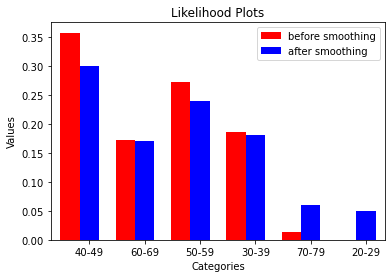

In [96]:
bar_width = 0.35
categories = likelihood_smooth['recurrence-events'][1].keys()
values1 = likelihood['recurrence-events'][1].values()
values2 = likelihood_smooth['recurrence-events'][1].values()
# Calculate the positions of the bars
bar_positions1 = [i - bar_width/2 for i in range(len(categories))]
bar_positions2 = [i + bar_width/2 for i in range(len(categories))]

# Create the first bar plot
plt.bar(bar_positions1, values1, color='red', width=bar_width, label= 'before smoothing' )

# Create the second bar plot
plt.bar(bar_positions2, values2, color='blue', width=bar_width, label= 'after smoothing')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Likelihood Plots')

# Add the categories as x-tick labels
plt.xticks(bar_positions2, categories)

# Set the x-axis limits so that the bars are centered
plt.xlim([min(bar_positions1) - bar_width, max(bar_positions2) + bar_width])
plt.legend(loc='best')
# Show the plot
plt.show()

In [97]:
#Finding Posterior Inference
clses = list(prior.keys())
pos = np.zeros((df_train.shape[0],len(clses)))
for i in range(df_train.shape[0]):
    for j,cls in enumerate(clses):
        pos_i = np.log(prior[cls])
        for col in range(1,10):
            pos_i = pos_i + np.log(likelihood_smooth[cls][col][df_train.loc[i,col]])
        pos[i,j]=pos_i

In [98]:
df_train.loc[:,"Prediction"]=np.array(cls_names)[np.argmax(pos, axis=1)]

C:\Users\91995\AppData\Local\Temp\ipykernel_11372\3314981118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.loc[:,"Prediction"]=np.array(cls_names)[np.argmax(pos, axis=1)]


In [99]:
#Training Accuracy
print("Train Accuray=", (df_train[0]==df_train['Prediction']).sum()/df_train.shape[0] )

print("Train F1-score",  f1_score(binarizer.transform(df_train[0].values), binarizer.transform(df_train['Prediction'].values), average='macro' ))

Train Accuray= 0.75
Train F1-score 0.6685962004335076


In [100]:
#Predicting on Test Data
pos = np.zeros((df_test.shape[0],len(clses)))
for i in range(df_test.shape[0]):
    for j,cls in enumerate(clses):
        pos_i = np.log(prior[cls])
        for col in range(1,10):
            pos_i = pos_i + np.log(likelihood_smooth[cls][col][df_train.loc[i,col]])
        pos[i,j]=pos_i

In [101]:
df_test.loc[:,"Prediction"]=np.array(cls_names)[np.argmax(pos, axis=1)]

C:\Users\91995\AppData\Local\Temp\ipykernel_11372\3350466438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.loc[:,"Prediction"]=np.array(cls_names)[np.argmax(pos, axis=1)]


In [102]:
print("Train Accuray=", (df_test[0]==df_test['Prediction']).sum()/df_test.shape[0] )

print("Train F1-score",  f1_score(binarizer.transform(df_test[0].values), binarizer.transform(df_test['Prediction'].values), average='macro' ))

Train Accuray= 0.6551724137931034
Train F1-score 0.4746376811594203
